# Exercise 1: NumPy array Indexing/Slicing

1.1) In this exercise, we will use the iris dataset. Load the "iris.csv" using the appropriate method for this file type (use the new functions from the package).

In [2]:
from si.io.csv_file import read_csv

df = read_csv("C:\\Users\\Romeu\\OneDrive\\Documentos\\GitHub\\SIB\\datasets\\iris\\iris.csv")

1.2) Select the penultimate independent variable. What is the dimension of the resulting array?

In [ ]:
penultimate_variable = df.X[:, -2]
print(penultimate_variable.shape)

(150,)


1.3) Select the last 10 samples from the iris dataset. What is the mean of the last 10 samples for each independent variable/feature?

In [ ]:
last_10 = df.X[-10:, :-1] # select last 10 rows and all columns except the last one (label)
means = last_10.mean(axis=0) # axis=0 is mean of each column
print(means)

[6.450000000000001 3.0300000000000002 5.33 2.1700000000000004]


1.4) Select all samples from the dataset with values less than or equal to 6 for all independent variables/features. How many samples do you obtain?

In [ ]:
# Get the features. It's df.X, but we must EXCLUDE the last column
features_str = df.X[:, :-1]
# Convert the feature strings to numbers (floats)
features_float = features_str.astype(float)
mask = (features_float <= 6).all(axis=1) # axis=1 to check all columns for each row, feature_float produce a bolean array
filtered_samples = df.X[mask]
print(filtered_samples.shape[0])

89


1.5) Select all samples with a class/label different from 'Iris-setosa'. How many samples do you obtain?

In [ ]:
# Get the label column (the last column of df.X)
labels = df.X[:, -1]

# Create the mask
mask = labels != 'Iris-setosa' # boolean array where True means the label is not 'Iris-setosa'

# Apply the mask to df.X
filtered_samples = df.X[mask]

print(filtered_samples.shape[0])

100


# Exercise 2: Add examples of how to use these methods to the script/notebook of Exercise 1

## Cleaning Methods

dropna

In [ ]:
import numpy as np
from si.data.dataset import Dataset

# Convert DataFrame to NumPy arrays
X = df.iloc[:, :-1].values # All columns except the last one, iloc for selection by position
y = df.iloc[:, -1].values

# Add a NaN value for demonstration (so dropna has an effect)
X[0, 0] = np.nan   # Set first feature of first sample to NaN

# Create Dataset object
ds = Dataset(X, y)
print("Before dropna:", ds.X.shape, ds.y.shape)

# Apply dropna method
ds.dropna()
print("After dropna:", ds.X.shape, ds.y.shape)

Before dropna: (150, 4) (150,)
After dropna: (149, 4) (149,)


fillna

In [7]:
ds_nan2 = Dataset(np.copy(X), np.copy(y))
ds_nan2.X[0,1] = np.nan  # Add a NaN for demonstration
ds_nan2.fillna("mean")
print("After fillna('mean') on first feature of first sample:")
print(ds_nan2.X[0,:])

After fillna('mean') on first feature of first sample:
[5.84832215 3.05100671 1.4        0.2       ]


remove_by_index

In [8]:
ds_rem = Dataset(np.copy(X), np.copy(y))
ds_rem.remove_by_index(0)
print("After remove_by_index(0):")
print(ds_rem.X.shape, ds_rem.y.shape)


After remove_by_index(0):
(149, 4) (149,)


# Exercise 3: Test the SelectPercentile class in a Jupyter notebook using the "iris.csv" dataset (classification).

 Load data and Dataset Object

In [ ]:
import pandas as pd
from si.data.dataset import Dataset

file_path = "C:/Users/Romeu/OneDrive/Documentos/GitHub/SIB/datasets/iris/iris.csv"

df = pd.read_csv(file_path)
    
# Separate X, y, and feature names from the pandas DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
features = df.columns[:-1].tolist()

# Create Dataset
iris_dataset = Dataset(X, y, features=features, label="class")

SelectPercentile, Fit and Transform

In [16]:
from si.feature_selection.select_percentile import SelectPercentile
from si.statistics.f_classification import f_classification

selector = SelectPercentile(percentile=50)
selector.fit(iris_dataset)
transformed_dataset = selector.transform(iris_dataset)

Results

In [17]:
print("Original shape:", iris_dataset.X.shape)
print("Original features:", iris_dataset.features)

print("\nTransformed shape:", transformed_dataset.X.shape)
print("Transformed features:", transformed_dataset.features)

Original shape: (150, 4)
Original features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Transformed shape: (150, 2)
Transformed features: [np.str_('petal_length'), np.str_('petal_width')]


Statistics

In [18]:
# Get the boolean mask
support_mask = selector.get_support()
print("Support mask:", support_mask)

# Get the indices
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

# Check the F-values and p-values
print("\nF-values for all features:", selector.F)
print("p-values for all features:", selector.p)

Support mask: [False False  True  True]
Selected feature indices: [2 3]

F-values for all features: [ 119.26450218   47.3644614  1179.0343277   959.32440573]
p-values for all features: [1.66966919e-31 1.32791652e-16 3.05197580e-91 4.37695696e-85]


# Exercise 5: Implement the PCA Class

5.2) Test the PCA class in a jupyter notebook using the iris.csv dataset (classificação).

In [ ]:
from si.decomposition.pca import PCA

pca = PCA(n_components=2)

# Fit PCA to the data
pca.fit(iris_dataset)

# Transform the dataset
transformed_dataset = pca.transform(iris_dataset)

# Print Results
print("\nResults:")
print("Original shape:", iris_dataset.X.shape)
print("\nTransformed shape:", transformed_dataset.X.shape)
print("Transformed features:", transformed_dataset.features)

print("\nMean used for centering:", pca.mean)
print("Principal components (eigenvectors):\n", pca.components)
print("Explained variance by each component:", pca.explained_variance)


--- Results ---
Original shape: (150, 4)

Transformed shape: (150, 2)
Transformed features: ['PC1', 'PC2']

Mean used for centering: [5.84333333 3.054      3.75866667 1.19866667]
Principal components (eigenvectors):
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
Explained variance by each component: [0.92461621 0.05301557]


Plot the results

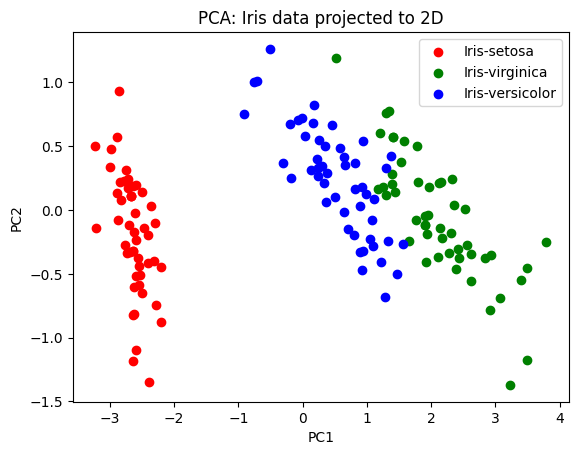

In [21]:
import matplotlib.pyplot as plt

X_reduced = transformed_dataset.X

# Color map for the labels
unique_labels = list(set(y))
colors = ['r', 'g', 'b']

plt.figure()
for label, color in zip(unique_labels, colors):
    idx = (y == label)
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=color, label=label)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Iris data projected to 2D')
plt.legend()
plt.show()


# Exercise 6: Implementing stratified splitting

##  6.2) Test the "stratified_train_test_split" function with the iris dataset.

Stratified train test split

In [ ]:
import numpy as np
from si.model_selection.split import stratified_train_test_split

train_set, test_set = stratified_train_test_split(iris_dataset, 
                                                test_size=0.2, 
                                                random_state=42) # Stratified so that class proportions are preserved

print(f"Training set shape:   {train_set.shape()}")
print(f"Test set shape:       {test_set.shape()}")

# Get counts for original dataset
original_classes, original_counts = np.unique(iris_dataset.y, return_counts=True) # np.unique returns the unique classes and their counts
print("\nOriginal counts:")
for cls, count in zip(original_classes, original_counts): # zip to iterate over classes and their counts
    print(f"  {cls}: {count} samples")

# Get counts for training set
train_classes, train_counts = np.unique(train_set.y, return_counts=True)
print("\nTraining set counts:")
for cls, count in zip(train_classes, train_counts):
    print(f"  {cls}: {count} samples")

# Get counts for test set
test_classes, test_counts = np.unique(test_set.y, return_counts=True)
print("\nTest set counts:")
for cls, count in zip(test_classes, test_counts):
    print(f"  {cls}: {count} samples")

Training set shape:   (120, 4)
Test set shape:       (30, 4)

Original counts:
  Iris-setosa: 50 samples
  Iris-versicolor: 50 samples
  Iris-virginica: 50 samples

Training set counts:
  Iris-setosa: 40 samples
  Iris-versicolor: 40 samples
  Iris-virginica: 40 samples

Test set counts:
  Iris-setosa: 10 samples
  Iris-versicolor: 10 samples
  Iris-virginica: 10 samples


# Exercise 7: Implementing the KNNRegressor with RMSE

## 7.3) Test the "KNNRegressor" class using the "cpu.csv" dataset (regression).

Imports and Data

In [ ]:
import pandas as pd
from si.data.dataset import Dataset
from si.model_selection.split import train_test_split
from si.models.KNNRegressor import KNNRegressor

file_path = "C:/Users/Romeu/OneDrive/Documentos/GitHub/SIB/datasets/cpu/cpu.csv"

df = pd.read_csv(file_path)
    
# Separate X, y, and feature names
# For cpu.csv, the label (y) is the LAST column
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
features = df.columns[:-1].tolist() #tolist() to convert Index to list
    
# Create Dataset
cpu_dataset = Dataset(X, y, features=features, label="cpu_performance")

Data split

In [2]:
# Standard train_test_split for regression
train_set, test_set = train_test_split(cpu_dataset, test_size=0.2, random_state=42)

print(f"Training set shape:   {train_set.shape()}")
print(f"Test set shape:       {test_set.shape()}")

Training set shape:   (168, 6)
Test set shape:       (41, 6)


Fit and Score

In [ ]:
# Instantiate the regressor (using k=3)
knn_reg = KNNRegressor(k=3)
print("Instantiated KNNRegressor(k=3)")

# Fit on the training set
knn_reg.fit(train_set)

# Score on the test set
# The .score() method will automatically call _predict() and then rmse()
rmse_score = knn_reg.score(test_set)

Instantiated KNNRegressor(k=3)
Fitting model...
Fit complete.
Scoring model...
Score complete.


Results

In [4]:
print(f"RMSE on test set: {rmse_score:.4f}")

RMSE on test set: 81.3626


# Exercise 9: Implementing the RandomForestClassifier class

## 9.2) Test the random forest class using the following protocol:

Use the iris.csv dataset

In [ ]:
import pandas as pd
from si.data.dataset import Dataset
from si.model_selection.split import train_test_split
from si.models.random_forest_classifier import RandomForestClassifier

file_path = "C:/Users/Romeu/OneDrive/Documentos/GitHub/SIB/datasets/iris/iris.csv"
df = pd.read_csv(file_path)

X = df.iloc[:, :-1].values 
y_strings = df.iloc[:, -1].values # original string array
features = df.columns[:-1].tolist()

# Convert string labels ('Iris-setosa', etc.) to numeric labels (0, 1, 2)
# pd.factorize() returns an array of numbers and an array of the unique labels
y, labels = pd.factorize(y_strings)

print(f"\nLabels converted to numeric: {list(zip(labels, range(len(labels))))}")

iris_dataset = Dataset(X, y, features=features, label="class")

print("Dataset shape:", iris_dataset.shape())


Labels converted to numeric: [('Iris-setosa', 0), ('Iris-versicolor', 1), ('Iris-virginica', 2)]
Dataset shape: (150, 4)


Split the data into train and test sets

In [6]:
train_set, test_set = train_test_split(iris_dataset, test_size=0.2, random_state=42)

print(f"Training set shape:   {train_set.shape()}")
print(f"Test set shape:       {test_set.shape()}")

Training set shape:   (120, 4)
Test set shape:       (30, 4)


Create the RandomForestClassifier model

In [7]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, seed=42)

Train the model. What is the score of the model on the test set?

In [8]:
rf.fit(train_set)
test_score = rf.score(test_set)
print(f"Random Forest accuracy on test set: {test_score:.4f}")

Random Forest accuracy on test set: 1.0000
